# Random Forrest

In [21]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
filename = "X.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
X = pd.read_csv(filepath,index_col=False, header=0)

In [23]:
filename = "y.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
y = pd.read_csv(filepath,index_col=False, names=["Value"])


## Dataset 

* X

* y

In [24]:
X.head()

,Price,lag1,peek1,lag2,peek2,peek3,peek9,lag10,peek10,lag11,peek11,lag12,peek12
0,7.41,3.635,3.296,3.829,4.542,5.006,4.815,4.403,3.950,3.196,3.749,2.965,3.168
1,7.61,3.058,4.542,3.635,5.006,5.526,3.950,4.853,3.749,4.403,3.168,3.196,3.415
2,7.79,3.296,5.006,3.058,5.526,5.576,3.749,5.357,3.168,4.853,3.415,4.403,4.705
3,7.98,4.542,5.526,3.296,5.576,5.853,3.168,5.406,3.415,5.357,4.705,4.853,5.185
4,8.14,5.006,5.576,4.542,5.853,5.793,3.415,5.675,4.705,5.406,5.185,5.357,5.724


In [25]:
y.head()

,Value
0,3.058
1,3.296
2,4.542
3,5.006
4,5.526


In [26]:
y = y.values.reshape(-1, 1)
print(X.shape, y.shape)

(315, 13) (315, 1)


## Split dataset into Train and Test

Given the dataset is a time series, we will leave the last 12 months as test data.

In [27]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]



## Scale the data and plot the difference

In [28]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)

X_train_scaled: (302, 13)
y_train_scaled: (302, 1)
X_test_scaled: (12, 13)
y_test_scaled: (12, 1)


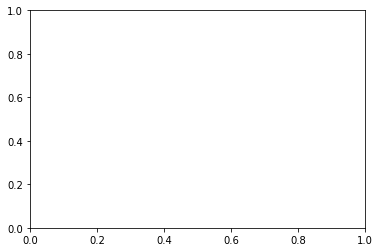

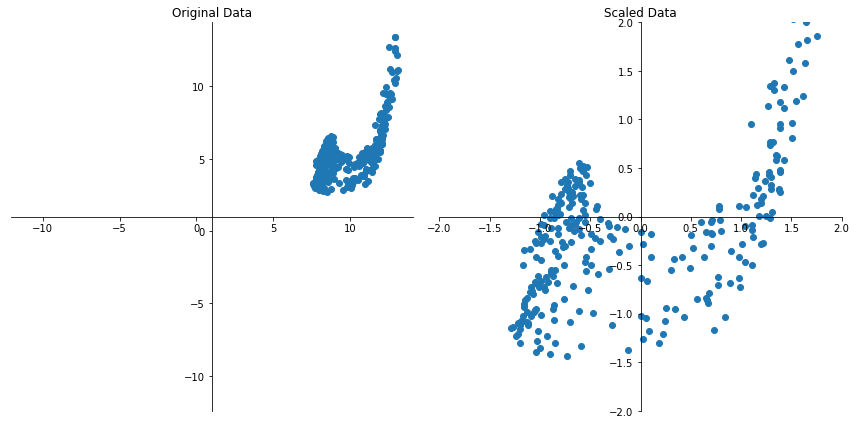

In [29]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/LR_scaled_features.png")
plt.show()


## Create the Random Forrest model

Train the model and plot results

In [30]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(max_depth=2,random_state=0)
y_train_ravel = np.ravel(y_train_scaled)
rf.fit(X_train_scaled, y_train_ravel)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
# plt.scatter(rf.predict(X_train_scaled), rf.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(rf.predict(X_test_scaled), rf.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.tight_layout()
# plt.savefig("../../images/RF_residual.png")
# plt.show()

## Evaluate the model

In [32]:
rf.score(X_test_scaled, y_test_scaled)


-0.4612961350518487

In [33]:
from sklearn.metrics import mean_squared_error

predictions = rf.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = rf.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.8428645011284956, R2: -0.4612961350518487
